# A CAUSAL DISCOVERY ALGORITHM - DATASET 1

The following notebook is used in order to show how the functions defined in helpers.py work. It is also interesting to observe whether the results match with the ground truth DAGS described in the pdf.

In [10]:
# Import useful libraries
import numpy as np
from ci_test import ci_test
from scipy.io import loadmat
import networkx as nx
from itertools import chain, combinations, permutations
from helpers import *

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data

In [11]:
# Importing data to use for cross validation (500 * 5)
validation_data = loadmat('data1.mat')['D']

## Tuning the alpha parameter

In order to find the value of alpha that performs best with the given dataset, we run the function alpha_tuning defined in the helpers file. Moreover, in order to have true labels regarding the d-separation property between nodes, we use the function d_separation provided by the networkx library. In order to use it, we need to define a DiGraph (directed graph) resembling the one shown in figure 2.a.

In [12]:
# Defining the true graph
true_G = nx.DiGraph()

# Adding nodes
for node_id in range(5):
    true_G.add_node(node_id)
    
# Adding edges
true_G.add_edge(0,1)
true_G.add_edge(0,2)
true_G.add_edge(2,1)
true_G.add_edge(3,2)
true_G.add_edge(3,4)

We now run the alpha tuning function to obtain a plot describing how the f1 score changes depending on the value of the parameter. We notice that the lower the value is, the better the result seems to be.

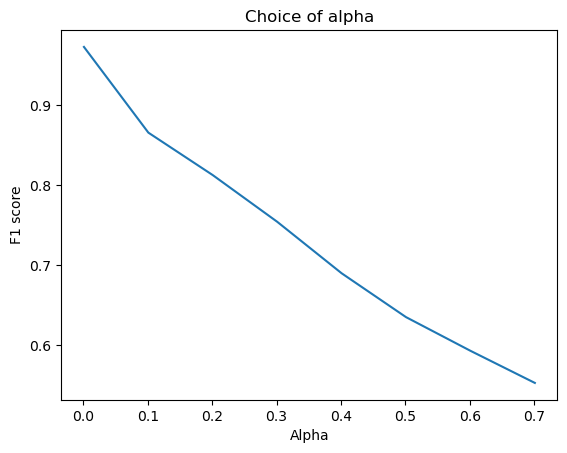

In [13]:
alpha_tuning(validation_data, true_G)

## Building the moralized graph using step 1 of  the GS algorithm

In [14]:
G, MBs_dict= build_moralized_graph(validation_data, alpha = 0.01)

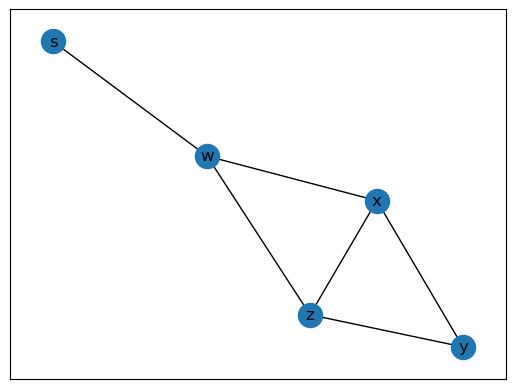

In [15]:
# In order to visualize the built graph, we add labels to each node. Notice that this plotting procedure only
# works for data sampled from the structure generating data in the first dataset.
nx.draw_networkx(G, labels = {0:'x', 1:'y',2:'z',3:'w',4:'s'},with_labels=True)

## Implementing the step 2 of the GS algorithm - Identyfing the v structures

It breaks because ci_test(0,2,[1],0.01) gives True rather than false and because the v structures are [1,2,3] and [2,3,4].

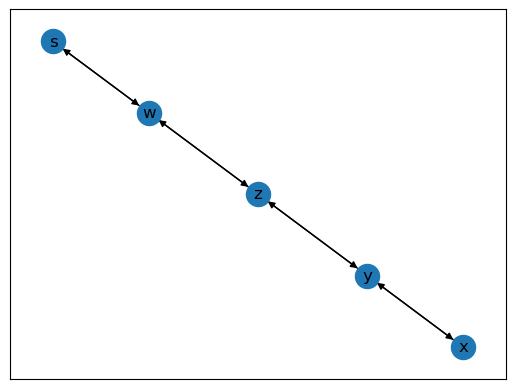

In [16]:
new_G = second_step_GS(G,validation_data, 0.01, MBs_dict)
nx.draw_networkx(new_G,labels = {0:'x', 1:'y',2:'z',3:'w',4:'s'},with_labels=True)

## Implementing the Meek Rule

In [8]:
final = meek_orientation(G, validation_data, 0.01)

Final graph is ready!!


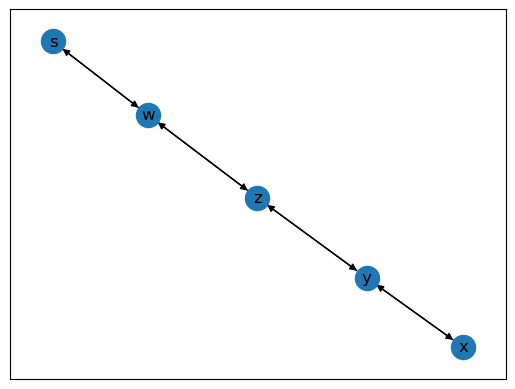

In [9]:
nx.draw_networkx(final,labels = {0:'x', 1:'y',2:'z',3:'w',4:'s'},with_labels=True)